In [1]:
import pandas as pd

# read in all csvs
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")
lap_times = pd.read_csv("lap_times.csv")
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")

In [2]:
driver_standings
driver_standings.rename(columns={'points': 'd_points'}, inplace=True)
driver_standings.rename(columns={'position': 'd_position'}, inplace=True)
driver_standings.rename(columns={'positionText': 'd_positionText'}, inplace=True)
driver_standings.rename(columns={'wins': 'd_wins'}, inplace=True)


In [3]:
constructor_standings
constructor_standings.rename(columns={'points': 'c_points'}, inplace=True)
constructor_standings.rename(columns={'position': 'c_position'}, inplace=True)
constructor_standings.rename(columns={'positionText': 'c_positionText'}, inplace=True)
constructor_standings.rename(columns={'wins': 'c_wins'}, inplace=True)


In [4]:
# races

race_df = pd.merge(races, results, on="raceId")
race_df.head(5)
race_df.rename(columns={'time_y': 'driverRaceTime'}, inplace=True)
race_df.rename(columns={'time_x': 'time'}, inplace=True)

race_df.head(5)

race_df = pd.merge(race_df, driver_standings, on=["raceId", "driverId"])
race_df = pd.merge(race_df, constructor_standings, on=["raceId", "constructorId"])
race_df.info()
race_df = pd.merge(race_df, status, on=["statusId"])
race_df = pd.merge(race_df, status, on=["driverId"])





<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   raceId                  23699 non-null  int64  
 1   year                    23699 non-null  int64  
 2   round                   23699 non-null  int64  
 3   circuitId               23699 non-null  int64  
 4   name                    23699 non-null  object 
 5   date                    23699 non-null  object 
 6   time                    23699 non-null  object 
 7   url                     23699 non-null  object 
 8   fp1_date                23699 non-null  object 
 9   fp1_time                23699 non-null  object 
 10  fp2_date                23699 non-null  object 
 11  fp2_time                23699 non-null  object 
 12  fp3_date                23699 non-null  object 
 13  fp3_time                23699 non-null  object 
 14  quali_date              23699 non-null

KeyError: 'driverId'

In [ ]:
# qualifying

qual_df = pd.merge(qualifying, results, on="raceId")
qual_df.head(5)
qual_df.rename(columns={'time_y': 'driverRaceTime'}, inplace=True)
qual_df.rename(columns={'time_x': 'time'}, inplace=True)

qual_df.head(5)

qual_df.info()
qual_df = pd.merge(race_df, status, on=["statusId"])
qual_df = pd.merge(drivers, status, on=["driverId"])


#lap_times # can get average lap time for driver and race

# pit_stops # get average stop time for driver and race



In [5]:
race_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,...,d_points,d_position,d_positionText,d_wins,constructorStandingsId,c_points,c_position,c_positionText,c_wins,status
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,10.0,1,1,1,4038,18.0,1,1,1,Finished
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,8.0,2,2,0,4038,18.0,1,1,1,Finished
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,6.0,3,3,0,4039,11.0,2,2,0,Finished
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,5.0,4,4,0,4039,11.0,2,2,0,Finished
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,4.0,5,5,0,4040,4.0,3,3,0,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,12:10:00,http://en.wikipedia.org/wiki/2020_Emilia_Romag...,\N,\N,...,1.0,19,19,0,27622,3.0,9,9,0,Illness
23695,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,2021-12-10,\N,...,0.0,21,21,0,27932,0.0,10,10,0,Illness
23696,1075,2022,2,77,Saudi Arabian Grand Prix,2022-03-27,17:00:00,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,2022-03-25,14:00:00,...,8.0,9,9,0,28146,9.0,6,6,0,Cooling system
23697,1084,2022,11,70,Austrian Grand Prix,2022-07-10,13:00:00,http://en.wikipedia.org/wiki/2022_Austrian_Gra...,2022-07-08,11:30:00,...,0.0,20,20,0,28250,3.0,10,10,0,Undertray


In [ ]:
driver_standings

In [ ]:
race_df

In [7]:
# get average pit stop time for driver and race
pit_stops['average_pit_stop_duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')

average_pit_stop_duration = pit_stops.groupby(['raceId', 'driverId'])['average_pit_stop_duration'].mean().reset_index()
average_pit_stop_duration


#merging to qual and race dfs

race_df = pd.merge(race_df, average_pit_stop_duration, on=["raceId", "driverId"])

qual_df = pd.merge(race_df, average_pit_stop_duration, on=["raceId", "driverId"])

average_pit_stop_duration.head(5)

,raceId,driverId,average_pit_stop_duration
0,841,1,23.213
1,841,2,24.046
2,841,3,23.716
3,841,4,24.055
4,841,5,24.865


In [8]:
#lap_times # can get average lap time for driver and race

def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    seconds, tenths = seconds.split('.')
    total_seconds = int(minutes) * 60 + int(seconds) + int(tenths) * 0.1
    return total_seconds

# Apply the function to the 'time' column
lap_times['average_lap_seconds'] = lap_times['time'].apply(time_to_seconds)

#average lap time (in seconds) per race per driver
average_lap_duration = lap_times.groupby(['raceId', 'driverId'])['average_lap_seconds'].mean().reset_index()



#merging to qual and race dfs
race_df = pd.merge(race_df, average_lap_duration, on=["raceId", "driverId"])

qual_df = pd.merge(race_df, average_lap_duration, on=["raceId", "driverId"])


In [9]:
average_lap_duration.head(5)


,raceId,driverId,average_lap_seconds
0,1,1,97.560345
1,1,2,97.641379
2,1,3,97.610345
3,1,4,97.594828
4,1,6,91.835294


In [10]:
qual_df.head(5)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,...,d_wins,constructorStandingsId,c_points,c_position,c_positionText,c_wins,status,average_pit_stop_duration,average_lap_seconds_x,average_lap_seconds_y
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,1,24660,35.0,1,1,1,Finished,23.319500,92.587931,92.587931
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,0,24660,35.0,1,1,1,Finished,24.058667,93.241379,93.241379
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,0,24661,26.0,2,2,0,Finished,23.213000,92.972414,92.972414
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,0,24661,26.0,2,2,0,Finished,20.950333,93.527586,93.527586
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,0,24662,15.0,4,4,0,Finished,25.109000,93.127586,93.127586


In [11]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4699 entries, 0 to 4698
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   raceId                     4699 non-null   int64  
 1   year                       4699 non-null   int64  
 2   round                      4699 non-null   int64  
 3   circuitId                  4699 non-null   int64  
 4   name                       4699 non-null   object 
 5   date                       4699 non-null   object 
 6   time                       4699 non-null   object 
 7   url                        4699 non-null   object 
 8   fp1_date                   4699 non-null   object 
 9   fp1_time                   4699 non-null   object 
 10  fp2_date                   4699 non-null   object 
 11  fp2_time                   4699 non-null   object 
 12  fp3_date                   4699 non-null   object 
 13  fp3_time                   4699 non-null   objec

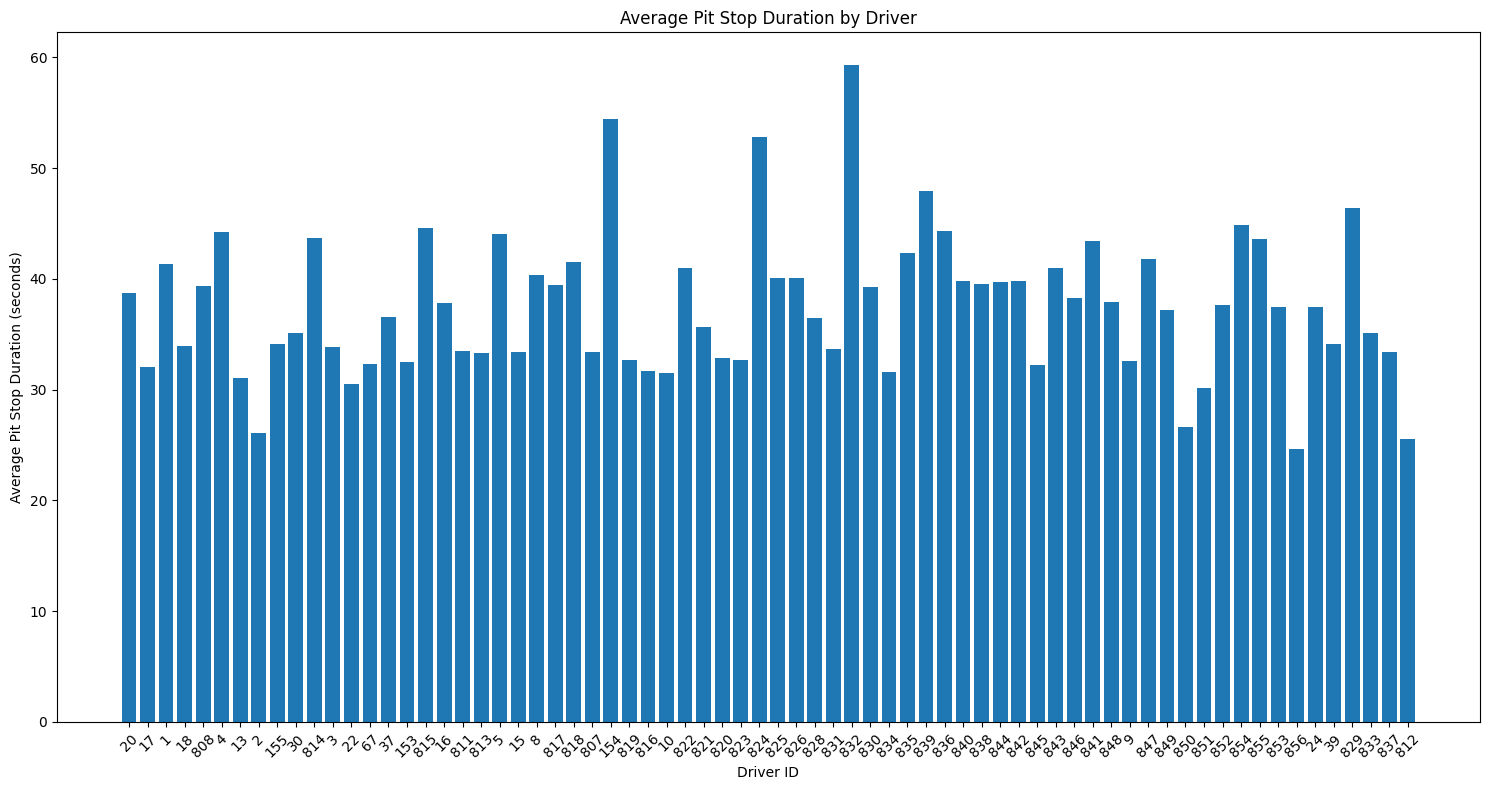

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.bar(race_df['driverId'].astype(str), race_df['average_pit_stop_duration'])
plt.xlabel('Driver ID')
plt.ylabel('Average Pit Stop Duration (seconds)')
plt.title('Average Pit Stop Duration by Driver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
